In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from ucimlrepo import fetch_ucirepo

# Fetch the adult dataset from UCI repository
adultdataset = fetch_ucirepo(id=2)

# Creating dataframe with feature columns and target columns
x = pd.DataFrame(adultdataset.data.features)
y = pd.DataFrame(adultdataset.data.targets, columns=['income'])
df = pd.concat([x, y], axis=1)

# Strip leading/trailing spaces from all columns including 'workclass'
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)
print(df.head(10))

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   
5   37           Private  284582    Masters             14   
6   49           Private  160187        9th              5   
7   52  Self-emp-not-inc  209642    HS-grad              9   
8   31           Private   45781    Masters             14   
9   42           Private  159449  Bachelors             13   

          marital-status         occupation   relationship   race     sex  \
0          Never-married       Adm-clerical  Not-in-family  White    Male   
1     Married-civ-spouse    Exec-managerial        Husband  White    Male   
2               Divorced  Handlers-cleaners  Not-in-family  White    Male   
3     Mar

Accuracy of Logistic Regression: 0.53


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


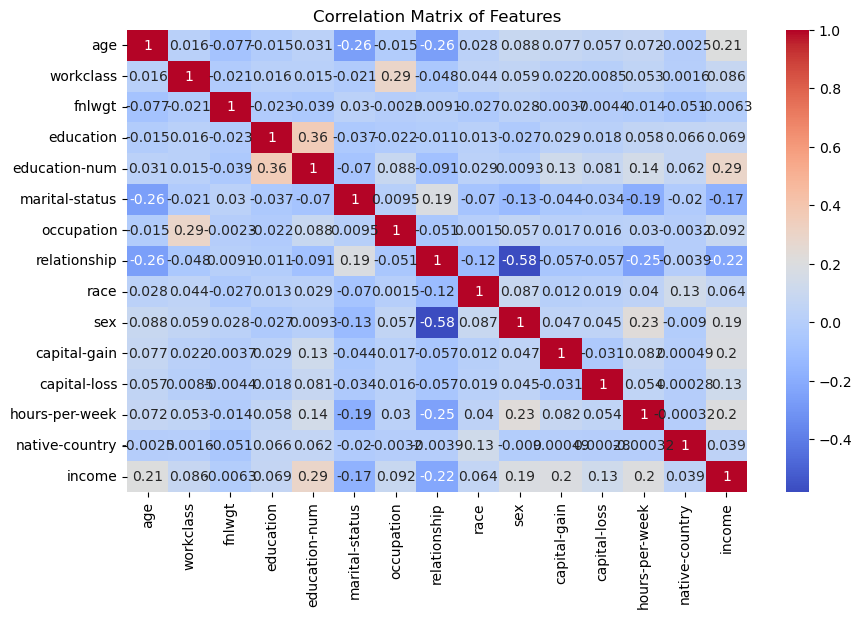

In [3]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Step 1: Label Encoding for categorical columns
# Create a list of categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to all categorical columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Step 2: Correlation Matrix for Numerical Features
# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()



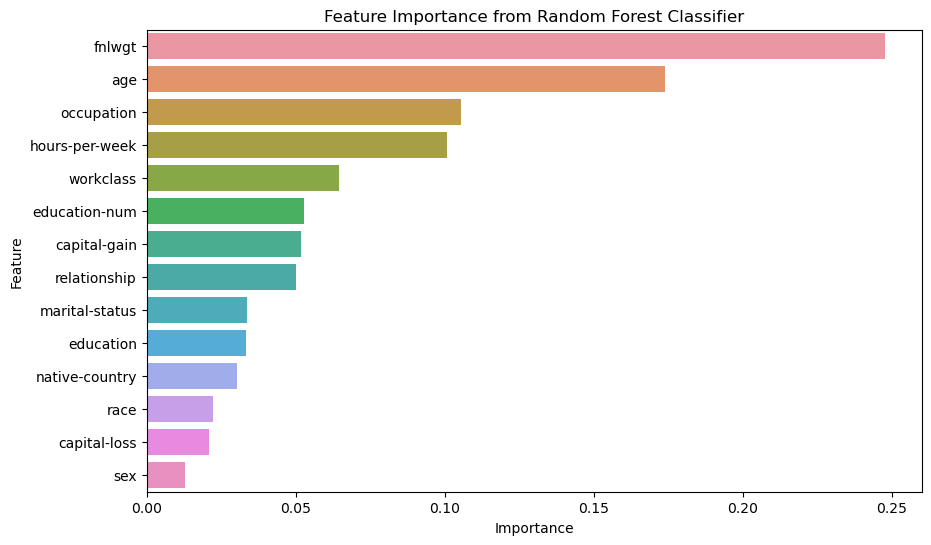

In [11]:
# Step 3: Split the dataset into features (X) and target (y)
X = df.drop(columns='income')  # All features except 'income'
y = df['income']  # Target column 'income'

# Step 4: Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Initialize and train RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 6: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Print classification report for more detailed evaluation
#print(classification_report(y_test, y_pred))

# Step 8: Feature Importance using Random Forest
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df)
plt.title('Feature Importance from Random Forest Classifier')
plt.show()


#Logistic Regression-Example of Multi Variate Analysis in Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Preprocessing: Convert categorical variables to numeric using LabelEncoder
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native-country'] = le.fit_transform(df['native-country'])
df['income'] = le.fit_transform(df['income'])

# Features (independent variables)
X = df.drop('income', axis=1)
# Target (dependent variable)
y = df['income']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions and accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression: {accuracy:.2f}')


In [12]:
#PCA Explanation with Example- PCA stands for Principal Component Analysis.PCA is a dimensionality reduction technique used in machine learning and statistics to transform a dataset with many features (or variables) into a smaller set that still contains most of the important information. 

#The main goal is to simplify the data while retaining its essential patterns and reducing noise.

In [5]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Sample grocery dataset (spending in dollars)
data = {
    'Fruits': [10, 20, 30, 40, 25, 50, 35, 20, 15, 45],
    'Vegetables': [5, 25, 20, 30, 15, 25, 10, 20, 35, 40],
    'Dairy': [12, 22, 32, 25, 20, 45, 30, 40, 50, 35],
    'Meat': [15, 35, 25, 40, 30, 45, 25, 35, 40, 50],
    'Snacks': [5, 20, 15, 35, 25, 30, 10, 25, 15, 20]
}

# Create a DataFrame
df_groceries = pd.DataFrame(data)
print(df_groceries)


   Fruits  Vegetables  Dairy  Meat  Snacks
0      10           5     12    15       5
1      20          25     22    35      20
2      30          20     32    25      15
3      40          30     25    40      35
4      25          15     20    30      25
5      50          25     45    45      30
6      35          10     30    25      10
7      20          20     40    35      25
8      15          35     50    40      15
9      45          40     35    50      20


In [6]:
# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_groceries)

# Print scaled data
print(X_scaled)


[[-1.50679801 -1.69774938 -1.70501737 -1.90957185 -1.73205081]
 [-0.71374643  0.24253563 -0.81233812  0.10050378  0.        ]
 [ 0.07930516 -0.24253563  0.08034113 -0.90453403 -0.57735027]
 [ 0.87235674  0.72760688 -0.54453434  0.60302269  1.73205081]
 [-0.31722063 -0.72760688 -0.99087397 -0.40201513  0.57735027]
 [ 1.66540833  0.24253563  1.24082416  1.1055416   1.15470054]
 [ 0.47583095 -1.21267813 -0.09819472 -0.90453403 -1.15470054]
 [-0.71374643 -0.24253563  0.79448453  0.10050378  0.57735027]
 [-1.11027222  1.21267813  1.68716378  0.60302269 -0.57735027]
 [ 1.26888254  1.69774938  0.34814491  1.6080605   0.        ]]


In [7]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio (how much variance is captured by each component)
print(f'Explained Variance Ratio: {pca.explained_variance_ratio_}')


Explained Variance Ratio: [0.6401475 0.1784011]


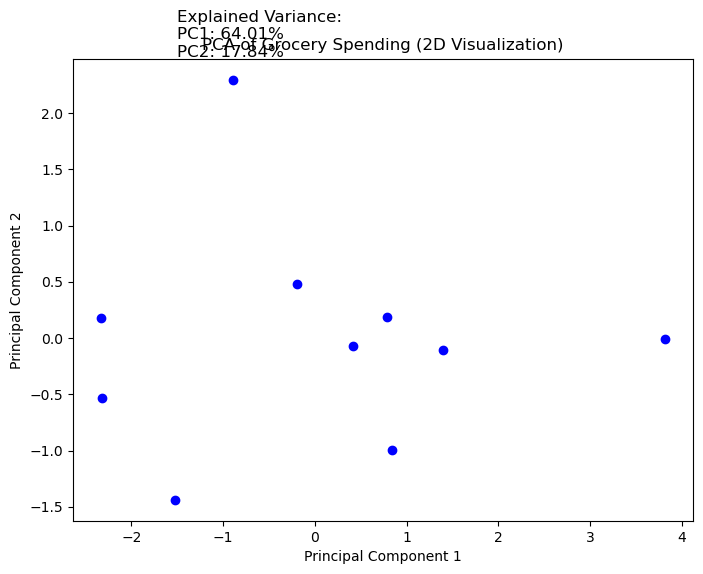

In [8]:
# Plot PCA result
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', marker='o')
plt.title('PCA of Grocery Spending (2D Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add the explained variance on the plot
explained_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
plt.text(-1.5, 2.5, f"Explained Variance:\nPC1: ", fontsize=12)

plt.show()
